In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install yfinance
# !pip install requests
# !pip install selenium

In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
import requests
import sys
import traceback
from getpass import getpass
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC

# Get Data

## Solana

In [19]:
solana_df = yf.download("SOL-USD", start="2021-01-01", end=datetime.today().strftime('%Y-%m-%d'))
solana_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,1.535606,1.550610,1.430263,1.510898,1.510898,12763260
2021-01-01,1.509775,1.859656,1.502038,1.842084,1.842084,25722549
2021-01-02,1.845586,1.989295,1.721482,1.799275,1.799275,31671064
2021-01-03,1.799902,2.364981,1.799902,2.161752,2.161752,55073422
2021-01-04,2.162412,2.485097,1.876342,2.485097,2.485097,59955405
...,...,...,...,...,...,...
2022-05-25,49.648418,50.442371,47.673145,47.982426,47.982426,1304580067
2022-05-26,47.983974,48.551022,42.321381,43.491211,43.491211,2208994514
2022-05-27,43.474380,43.813648,40.268963,40.981346,40.981346,2256358026


<AxesSubplot:xlabel='Date'>

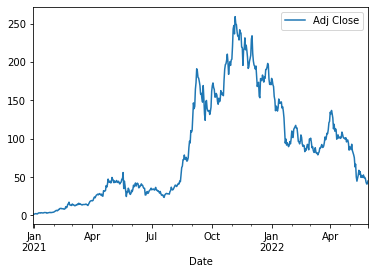

In [20]:
solana_df.plot(y = "Adj Close", use_index=True)

## Ethereum 

In [21]:
ethereum_df = yf.download("ETH-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
ethereum_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,712.211975,760.348022,710.119019,756.732971,756.732971,2554269952
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
...,...,...,...,...,...,...
2022-05-25,1978.677002,2014.369507,1943.938599,1944.827881,1944.827881,13364545730
2022-05-26,1945.033325,1962.171143,1759.199585,1803.913330,1803.913330,23458681818
2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032


<AxesSubplot:xlabel='Date'>

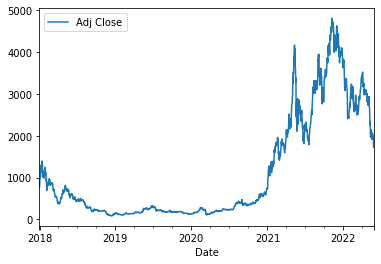

In [22]:
ethereum_df.plot(y = "Adj Close", use_index=True)

## Bitcoin

In [23]:
bitcoin_df = yf.download("BTC-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
bitcoin_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
...,...,...,...,...,...,...
2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748


<AxesSubplot:xlabel='Date'>

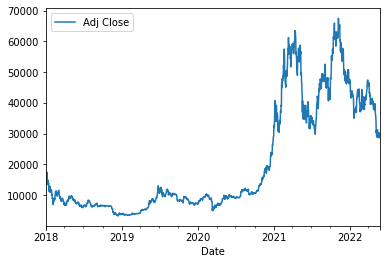

In [24]:
bitcoin_df.plot(y = "Adj Close", use_index=True)

In [25]:
bitcoin_df = bitcoin_df.reset_index()[['Date', 'Adj Close', 'Volume']]
bitcoin_df.rename(columns={"Date": "dates", "Adj Close" : "btc adj close", "Volume" : "btc volume"}, inplace = True)
bitcoin_df['dates'] = bitcoin_df['dates'].astype(str)

ethereum_df = ethereum_df.reset_index()[['Date', 'Adj Close', 'Volume']]
ethereum_df.rename(columns={"Date": "dates", "Adj Close" : "eth adj close", "Volume" : "eth volume"}, inplace = True)
ethereum_df['dates'] = ethereum_df['dates'].astype(str)

solana_df = solana_df.reset_index()[['Date', 'Adj Close', 'Volume']]
solana_df.rename(columns={"Date": "dates", "Adj Close" : "sol adj close", "Volume" : "sol volume"}, inplace = True)
solana_df['dates'] = solana_df['dates'].astype(str)

## Rarible

In [ ]:
dict_collections = {}
list_broken_urls = []
url_top_100 = 'https://api-mainnet.rarible.com/marketplace/api/v4/collections/top?days=30&size=100'
url_collections = 'https://rarible-cdn.reallm.io/collections/{}/{}?filters=%7B%7D'
broken_collection_url = 'https://rarible.com/collection/{}/stats?range=-Number.MAX_SAFE_INTEGER'
list_features = ['marketcap', 'lowwatermark', 'transactions', 'owners', 'sellers', 'buyers']


def get_collections_id(url):
    json = requests.get(
        url
    ).json()

    df_id = pd.DataFrame.from_dict(json)
    df_id = df_id[['id', 'name']]
    return df_id


def change_collection_data(df, feature):
    if feature == 'prices':
        df.rename(columns = {'dates': 'dates'}, inplace = True)
    elif feature == 'marketcap':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'marketcap'}, inplace = True)
        df = df[['dates', 'marketcap']]
    elif feature == 'lowwatermark':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'lowwatermark'}, inplace = True)
        df = df[['dates', 'lowwatermark']]
    elif feature == 'transactions':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_transactions'}, inplace = True)
        df = df[['dates', 'amount_transactions']]
    elif feature == 'owners':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_owners'}, inplace = True)
        df = df[['dates', 'amount_owners']]
    elif feature == 'sellers':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_sellers'}, inplace = True)
        df = df[['dates', 'amount_sellers']]
    elif feature == 'buyers':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_buyers'}, inplace = True)
        df = df[['dates', 'amount_buyers']]
    
    return df


def get_collection_data(id, features):
    df = pd.read_json(url_collections.format(id, 'prices'))
    for feature in features:
        tmp = pd.read_json(url_collections.format(id, feature))
        df = df.merge(change_collection_data(tmp, feature), how='left', on='dates')
        
    return df


def add_stocks(df):
    df = df.merge(bitcoin_df, how='left', on='dates')
    df = df.merge(ethereum_df, how='left', on='dates')
    df = df.merge(solana_df, how='left', on='dates')
    
    return df


def replace_nan(df):
    for i in df.columns[df.isnull().any(axis=0)]:
        for index, value in df[i].items():
            if np.isnan(value):
                try:
                    df[i].at[index] = df[i].iloc[index-3: index].mean()
                except:
                    pass

    return df    


df_id = get_collections_id(url_top_100)
for index, row in df_id.iterrows():
    try:
        tmp = get_collection_data(row['id'], list_features)
        tmp = replace_nan(tmp)
        tmp = add_stocks(tmp)
        dict_collections[row['name']] = tmp
        print("collection:", row['name'], "done")
    except:
        print("collection:", row['name'], "has not got dataset")
        print("url:", broken_collection_url.format(row['id']))
        list_broken_urls.append(broken_collection_url.format(row['id']))
        pass


collection: Otherdeed done
collection: Bored Ape Yacht Club done
collection: MutantApeYachtClub done
collection: Azuki done
collection: projectPXN done
collection: BEANZ Official done
collection: Doodles done
collection: Moonbirds done
collection: CloneX done
collection: ENS domains has not got dataset
url: https://rarible.com/collection/0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85/stats?range=-Number.MAX_SAFE_INTEGER
collection: Murakami.Flowers Seed done
collection: Murakami.Flowers done
collection: Art Blocks Factory done
collection: goblintown done
collection: Ragnarok done
collection: Meebits done
collection: Chimpers done
collection: Something Token done
collection: BoredApeKennelClub done
collection: VeeFriends Series 2 done
collection: Bored Ape Chemistry Club done
collection: adidas Originals: Into the Metaverse done
collection: RTFKT - MNLTH done
collection: DEGEN TOONZ done
collection: Genesis done
collection: Mindblowon done
collection: Imaginary Ones done
collection: Cool Ca

In [ ]:
with open('dataset.txt', 'w') as f:
    print(dict_collections, file=f)

In [15]:
dict_collections['MutantApeYachtClub']

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume
0,2021-08-29,30573.945494,0.000000,25978.451172,1.706332e+08,9.277673e+03,21245.703,5581,7080.0,5.0,37.000000,48829.832031,25889650240,3227.002686,13296586731,94.469673,1830344091
1,2021-08-30,42150.432895,0.000000,32023.800781,4.611257e+07,3.916317e+06,20522.010,1094,7503.0,2.0,46.000000,47054.984375,31847007016,3224.374268,19306924485,110.544807,5274104165
2,2021-08-31,34728.502238,0.000000,28324.003906,1.972579e+07,7.019255e+06,20522.010,568,7693.0,3.0,24.000000,47166.687500,34730363427,3433.732666,27280502987,108.483772,7590894022
3,2021-09-01,34049.167712,1848.198730,24513.210938,1.637765e+07,2.655862e+07,20522.010,481,7793.0,6.0,42.000000,48847.027344,39139399125,3834.828125,30070890104,111.033005,3974443896
4,2021-09-02,26299.774417,12414.097656,22857.037109,1.041471e+07,1.794458e+08,20522.010,396,7933.0,9.0,21.000000,49327.722656,39508070319,3790.989990,24387397330,128.102386,5074399603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2022-05-24,40576.680246,38182.019531,39457.140625,2.840368e+05,7.075128e+08,24113.527,7,13874.0,149.0,1.027028,29655.585938,26616506245,1978.982788,13057109007,49.653336,1508166642
264,2022-05-25,40487.274740,38534.191406,39874.847656,3.643855e+05,7.140386e+08,24113.527,9,13890.0,134.0,1.018967,29562.361328,27525063551,1944.827881,13364545730,47.982426,1304580067
265,2022-05-26,37905.903409,33090.820312,37436.042969,4.169649e+05,6.131729e+08,24113.527,11,13907.0,163.0,1.025290,29267.224609,36774325352,1803.913330,23458681818,43.491211,2208994514
266,2022-05-27,31247.559082,29330.167969,31592.757812,2.499805e+05,5.434880e+08,24113.527,8,13925.0,68.0,1.023762,28627.574219,36582005748,1724.922852,25470760032,40.981346,2256358026
